# ``Unsupervised Learning Analysis Process``

The overall process that we will follow when developing an unsupervised learning model can be summarized in the following chart:

<img src= 'b_img.png'>

**Unsupervised learning** main applications are:

-    Segmenting datasets by some shared atributes.
-    Detecting anomalies that do not fit to any group.
-    Simplify datasets by aggregating variables with similar atributes.

In summary, the main goal is to study the intrinsic (and commonly hidden) structure of the data.

This techniques can be condensed in two main types of problems that unsupervised learning tries to solve. This problems are:

### 1) Clustering
### 2) Dimensionality Reduction


<hr>

# ``Clustering``

However, when dealing with real-world problems, most of the time, data will not come with predefined labels, so we will want to develop machine learning models that can classify correctly this data, by finding by themselves some commonality in the features, that will be used to predict the classes on new data.

Cluster analysis, or clustering, is an unsupervised machine learning task.

In basic terms, the objective of clustering is to find different groups within the elements in the data. To do so, clustering algorithms find the structure in the data so that elements of the same cluster (or group) are more similar to each other than to those from different clusters.

It involves automatically discovering natural grouping in data. Unlike supervised learning (like predictive modeling), clustering algorithms only interpret the input data and find natural groups or clusters in feature space.

Many algorithms use similarity or distance measures between examples in the feature space in an effort to discover dense regions of observations. As such, it is often good practice to scale data prior to using clustering algorithms.

A list of 10 of the more popular algorithms is as follows:

-    Affinity Propagation
-    Agglomerative Clustering
-    BIRCH
-    DBSCAN
-    K-Means
-    Mini-Batch K-Means
-    Mean Shift
-    OPTICS
-    Spectral Clustering
-    Mixture of Gaussians

E.g. K-Means (distance between points), Affinity propagation (graph distance), Mean-shift (distance between points), DBSCAN (distance between nearest points), Gaussian mixtures (Mahalanobis distance to centers), Spectral clustering (graph distance) etc.

<hr>

# **DBSCAN** (Density-Based Spatial Clustering of Applications with Noise )

Fundamentally, all clustering methods use the same approach i.e. first we calculate similarities and then we use it to cluster the data points into groups or batches. Here we will focus on **Density-based spatial clustering of applications with noise** (DBSCAN) clustering method.

Clusters are dense regions in the data space, separated by regions of the lower density of points. The **DBSCAN algorithm** is based on this intuitive notion of “clusters” and “noise”. The key idea is that for each point of a cluster, the neighborhood of a given radius has to contain at least a minimum number of points.

DBSCAN is a density-based clustered algorithm similar to mean-shift, but with a couple of notable advantages. 

DBSCAN Clustering involves finding high-density areas in the domain and expanding those areas of the feature space around them as clusters.

<img src = 'a_img.gif'>


### **How DBSCAN works?**

1.    DBSCAN begins with an arbitrary starting data point that has not been visited. The neighborhood of this point is extracted using a distance epsilon ε (All points which are within the ε distance are neighborhood points).
2.    If there are a sufficient number of points (according to minPoints) within this neighborhood then the clustering process starts and the current data point becomes the first point in the new cluster. Otherwise, the point will be labeled as noise (later this noisy point might become the part of the cluster). In both cases that point is marked as “visited”.
3.    For this first point in the new cluster, the points within its ε distance neighborhood also become part of the same cluster. This procedure of making all points in the ε neighborhood belong to the same cluster is then repeated for all of the new points that have been just added to the cluster group.
4.    This process of steps 2 and 3 is repeated until all points in the cluster are determined i.e all points within the ε neighborhood of the cluster have been visited and labeled.
5.    Once we’re done with the current cluster, a new unvisited point is retrieved and processed, leading to the discovery of a further cluster or noise. This process repeats until all points are marked as visited. Since at the end of this all points have been visited, each point will have been marked as either belonging to a cluster or being noise.

### **DBSCAN Assigning Criteria**

It is based on a number of points with a specified radius ε and there is a special label assigned to each datapoint. The process of assigning this label is the following:

-    It is a specified number (MinPts) of neighbour points. A core point will be assigned if there is this MinPts number of points that fall in the ε radius.
-    A border point will fall in the ε radius of a core point, but will have less neighbors than the MinPts number.
-    Every other point will be noise points.

### **DBSCAN Algorithm**

The algorithm follows the logic:

1.    Identify a core point and make a group for each one, or for each connected gorup of core points (if they staisfy the criteria to be core point).
2.    Identify and assign border points to their respective core points.

The following figure summarize very well this process and the commented notation.

<img src = 'c_img.png'>

## **DBSCAN algorithm requires two parameters**

1.    **eps** : It defines the neighborhood around a data point i.e. if the distance between two points is lower or equal to ‘eps’ then they are considered as neighbors. If the eps value is chosen too small then large part of the data will be considered as outliers. If it is chosen very large then the clusters will merge and majority of the data points will be in the same clusters. One way to find the eps value is based on the** k-distance graph**.
2.    **MinPts**: Minimum number of neighbors (data points) within eps radius. Larger the dataset, the larger value of MinPts must be chosen. As a general rule, the minimum MinPts can be derived from the number of dimensions D in the dataset as, MinPts >= D+1. The minimum value of MinPts must be chosen at least 3.

``In this algorithm, we have 3 types of data points.``

- **Core Point**: A point is a core point if it has more than MinPts points within eps.
- **Border Point**: A point which has fewer than MinPts within eps but it is in the neighborhood of a core point.
- **Noise or outlier**: A point which is not a core point or border point.

<img src = 'd_img.png'>

<hr>

### **DBSCAN algorithm can be abstracted in the following steps**

1.    Find all the neighbor points within eps and identify the core points or visited with more than MinPts neighbors.
2.    For each core point if it is not already assigned to a cluster, create a new cluster.
3.    Find recursively all its density connected points and assign them to the same cluster as the core point.
4.    A point a and b are said to be density connected if there exist a point c which has a sufficient number of points in its neighbors and both the points a and b are within the eps distance. This is a chaining process. So, if b is neighbor of c, c is neighbor of d, d is neighbor of e, which in turn is neighbor of a implies that b is neighbor of a.
5.    Iterate through the remaining unvisited points in the dataset. Those points that do not belong to any cluster are noise.

### **Below is the DBSCAN clustering algorithm in pseudocode:**

```
DBSCAN(dataset, eps, MinPts){
# cluster index
C = 1
for each unvisited point p in dataset {
         mark p as visited
         # find neighbors
         Neighbors N = find the neighboring points of p

         if |N|>=MinPts:
             N = N U N'
             if p' is not a member of any cluster:
                 add p' to cluster C 
}
```

<hr>

### **Advantages**
-    We do not need to specify the number of clusters.
-    There is high flexibility in the shapes and sizes that the clusters may adopt.
-    It is very useful to identify and deal with noise data and outliers.

DBSCAN poses some great advantages over other clustering algorithms. Firstly, it does not require a pe-set number of clusters at all. It also identifies outliers as noises, unlike mean-shift which simply throws them into a cluster even if the data point is very different. Additionally, it can find arbitrarily sized and arbitrarily shaped clusters quite well.

Partitioning methods (K-means, PAM clustering) and hierarchical clustering work for finding spherical-shaped clusters or convex clusters. In other words, they are suitable only for compact and well-separated clusters. Moreover, they are also severely affected by the presence of noise and outliers in the data.

Real life data may contain irregularities, like –
- i) Clusters can be of arbitrary shape such as those shown in the figure below.
- ii) Data may contain noise.

### **Disadvantages**
-    It faces difficulties when dealing with boirder points that are reachable by two clusters.
-    It doesn’t find well clusters of varying densities.

The main drawback of DBSCAN is that it doesn’t perform as well as others when the clusters are of varying density. This is because the setting of the distance threshold ε and minPoints for identifying the neighborhood points will vary from cluster to cluster when the density varies. This drawback also occurs with very high-dimensional data since again the distance threshold ε becomes challenging to estimate.

<hr>

### **Comparing with K-Means**

**Disadvantage Of K-MEANS:**

1.    K-Means forms spherical clusters only. This algorithm fails when data is not spherical ( i.e. same variance in all directions).
<img src = 'e_img.png'>

2.    K-Means algorithm is sensitive towards outlier. Outliers can skew the clusters in K-Means in very large extent.
<img src = 'e_img.png'>

3.    K-Means algorithm requires one to specify the number of clusters a priory etc.

Basically, DBSCAN algorithm overcomes all the above-mentioned drawbacks of K-Means algorithm. DBSCAN algorithm identifies the dense region by grouping together data points that are closed to each other based on distance measurement.

<hr>

# **PCA** (Principal Components Analysis)

### **What is PCA?**

Let’s say that you want to predict what the gross domestic product (GDP) of the United States will be for 2017. You have lots of information available: the U.S. GDP for the first quarter of 2017, the U.S. GDP for the entirety of 2016, 2015, and so on. You have any publicly-available economic indicator, like the unemployment rate, inflation rate, and so on. You have U.S. Census data from 2010 estimating how many Americans work in each industry and American Community Survey data updating those estimates in between each census. You know how many members of the House and Senate belong to each political party. You could gather stock price data, the number of IPOs occurring in a year, and how many CEOs seem to be mounting a bid for public office. Despite being an overwhelming number of variables to consider, this just scratches the surface.

TL;DR — you have a lot of variables to consider.

If you’ve worked with a lot of variables before, you know this can present problems. Do you understand the relationships between each variable? Do you have so many variables that you are in danger of overfitting your model to your data or that you might be violating assumptions of whichever modeling tactic you’re using?

You might ask the question, “How do I take all of the variables I’ve collected and focus on only a few of them?” In technical terms, you want to “reduce the dimension of your feature space.” By reducing the dimension of your feature space, you have fewer relationships between variables to consider and you are less likely to overfit your model. (Note: This doesn’t immediately mean that overfitting, etc. are no longer concerns — but we’re moving in the right direction!)

Somewhat unsurprisingly, **reducin**g the **dimension** of the feature space is called **“dimensionality reduction.”** There are many ways to achieve dimensionality reduction, but most of these techniques fall into one of two classes:

-    Feature Elimination
-    Feature Extraction

**Feature elimination** is what it sounds like: we reduce the feature space by eliminating features. In the GDP example above, instead of considering every single variable, we might drop all variables except the three we think will best predict what the U.S.’s gross domestic product will look like. Advantages of feature elimination methods include simplicity and maintaining interpretability of your variables.

As a disadvantage, though, you gain no information from those variables you’ve dropped. If we only use last year’s GDP, the proportion of the population in manufacturing jobs per the most recent American Community Survey numbers, and unemployment rate to predict this year’s GDP, we’re missing out on whatever the dropped variables could contribute to our model. By eliminating features, we’ve also entirely eliminated any benefits those dropped variables would bring.

**Feature extraction**, however, doesn’t run into this problem. Say we have ten independent variables. In feature extraction, we create ten “new” independent variables, where each “new” independent variable is a combination of each of the ten “old” independent variables. However, we create these new independent variables in a specific way and order these new variables by how well they predict our dependent variable.

You might say, “Where does the dimensionality reduction come into play?” Well, we keep as many of the new independent variables as we want, but we drop the “least important ones.” Because we ordered the new variables by how well they predict our dependent variable, we know which variable is the most important and least important. But — and here’s the kicker — because these new independent variables are combinations of our old ones, we’re still keeping the most valuable parts of our old variables, even when we drop one or more of these “new” variables!

Principal component analysis is a technique for feature extraction — so it combines our input variables in a specific way, then we can drop the “least important” variables while still retaining the most valuable parts of all of the variables! As an added benefit, each of the “new” variables after PCA are all independent of one another. This is a benefit because the assumptions of a linear model require our independent variables to be independent of one another. If we decide to fit a linear regression model with these “new” variables (see “principal component regression” below), this assumption will necessarily be satisfied.

### **When should I use PCA?**

1.    Do you want to reduce the number of variables, but aren’t able to identify variables to completely remove from consideration?
2.    Do you want to ensure your variables are independent of one another?
3.    Are you comfortable making your independent variables less interpretable?

If you answered “yes” to all three questions, then PCA is a good method to use. If you answered “no” to question 3, you **should not** use PCA.

<hr>

# ``Clustering``: **Mall Customers Dataset**

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.preprocessing import normalize

from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

In [55]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.1+ KB


In [57]:
df['Gender_Bin'] = [1 if i == 'Male' else 2 for i in df['Gender']]
df.drop(['Gender'], axis = 1, inplace = True)

In [59]:
df.rename(columns = {'Annual Income (k$)': 'Annual_Income', 'Spending Score (1-100)': 'Spending_Score'}, inplace = True)

In [60]:
df.head()

,CustomerID,Age,Annual_Income,Spending_Score,Gender_Bin
0,1,19,15,39,1
1,2,21,15,81,1
2,3,20,16,6,2
3,4,23,16,77,2
4,5,31,17,40,2


### __Visualisasi__

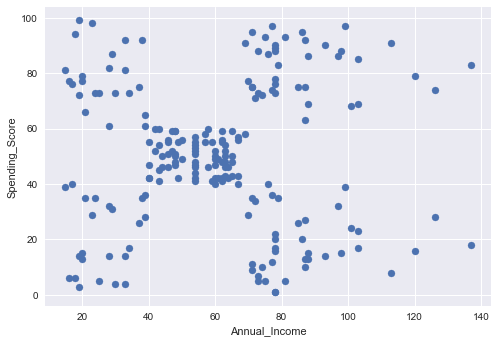

In [61]:
plt.style.use('seaborn')
plt.scatter(df['Annual_Income'], df['Spending_Score'])
plt.xlabel('Annual_Income')
plt.ylabel('Spending_Score')
plt.show()

### __Scalling__

In [63]:
#membatasi dataset -> hanya pakai feature 'Annual Income' & 'Spending Score'
df_clus = df[['Annual_Income', 'Spending_Score']]

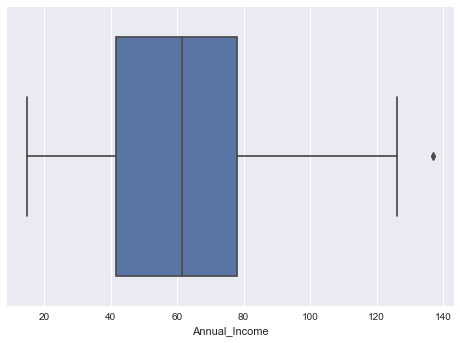

In [64]:
sns.boxplot(df['Annual_Income'])

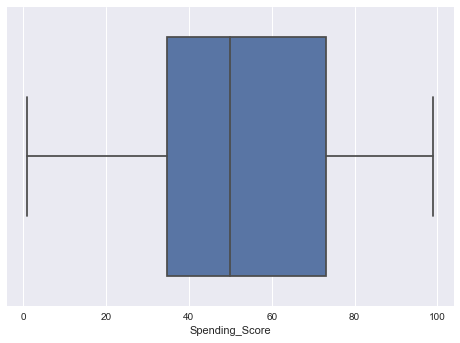

In [65]:
sns.boxplot(df['Spending_Score'])

In [66]:
rbs_scl = RobustScaler().fit(df_clus)
df_scl = rbs_scl.transform(df_clus)

### __Clustering using DBSCAN__

In [92]:
model = DBSCAN(eps = 0.3, min_samples = 10).fit(df_scl)

In [93]:
# cara pertama
labels = model.labels_
print('Cluster yang terbentuk: ', pd.unique(labels)) # label -1 dianggap outlier/anomalies
print(labels)

Cluster yang terbentuk:  [-1  0  1  2  3  4]
[-1  0  1  0 -1  0  1 -1  1  0  1 -1  1  0  1  0 -1  0 -1 -1 -1  0  1  0
  1  0  2 -1  2  0  1  0  1  0 -1  0 -1  0  2  2  2 -1  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  3  2  3  2  3  4  3  4  3  2  3  4  3  4  3  4  3  4  3  2  3
  4  3  2  3  4  3  4  3  4  3  4  3  4  3  4  3  2  3  4  3  4  3  4  3
  4 -1  4  3  4  3  4  3  4  3  4  3 -1  3  4  3 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1]


In [94]:
# cara kedua
pred_cluster = model.fit_predict(df_scl)
print('Cluster yang terbentuk: ', pd.unique(pred_cluster))
print(pred_cluster)

Cluster yang terbentuk:  [-1  0  1  2  3  4]
[-1  0  1  0 -1  0  1 -1  1  0  1 -1  1  0  1  0 -1  0 -1 -1 -1  0  1  0
  1  0  2 -1  2  0  1  0  1  0 -1  0 -1  0  2  2  2 -1  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  3  2  3  2  3  4  3  4  3  2  3  4  3  4  3  4  3  4  3  2  3
  4  3  2  3  4  3  4  3  4  3  4  3  4  3  4  3  2  3  4  3  4  3  4  3
  4 -1  4  3  4  3  4  3  4  3  4  3 -1  3  4  3 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1]


### __Visualisasi Clustering__

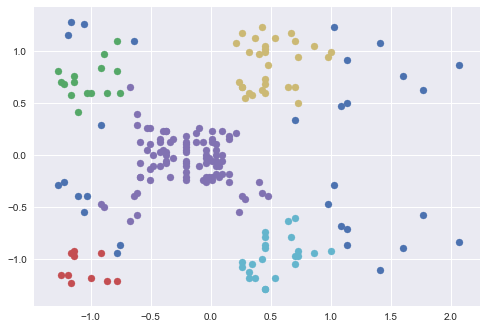

In [95]:
# cara pertama
clusters = pd.unique(pred_cluster)
for i in clusters:
    row = np.where(i == pred_cluster)
    plt.scatter(df_scl[row, 0], df_scl[row, 1])
plt.show()

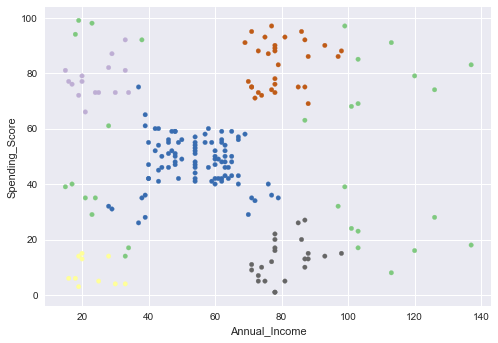

In [96]:
# cara kedua
from matplotlib import cm

cmap = cm.get_cmap('Accent')
df.plot.scatter(
    x = 'Annual_Income',
    y = 'Spending_Score',
    c = labels,
    cmap = cmap,
    colorbar = False
)
plt.show()

<hr>

# ``PCA``: **Credit Card Dataset**

This case requires to develop a customer segmentation to define marketing strategy. The
sample Dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables.

Following is the Data Dictionary for Credit Card dataset :-

- CUSTID : Identification of Credit Card holder (Categorical)
- BALANCE : Balance amount left in their account to make purchases (
- BALANCEFREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
- PURCHASES : Amount of purchases made from account
- ONEOFFPURCHASES : Maximum purchase amount done in one-go
- INSTALLMENTSPURCHASES : Amount of purchase done in installment
- CASHADVANCE : Cash in advance given by the user
- PURCHASESFREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
- ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
- PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
- CASHADVANCEFREQUENCY : How frequently the cash in advance being paid
- CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"
- PURCHASESTRX : Numbe of purchase transactions made
- CREDITLIMIT : Limit of Credit Card for user
- PAYMENTS : Amount of Payment done by user
- MINIMUM_PAYMENTS : Minimum amount of payments made by user
- PRCFULLPAYMENT : Percent of full payment paid by user
- TENURE : Tenure of credit card service for user

In [98]:
# open dataset
data = pd.read_csv('CC GENERAL.csv')
data.head(2)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.4,0.0,95.4,0.000000,0.166667,0.0,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.0,0.0,0.0,6442.945483,0.000000,0.0,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12


In [99]:
# drop feature
data.drop('CUST_ID', axis = 1, inplace = True)

In [100]:
data.shape

(8950, 17)

### __Checking Missing Value__

In [101]:
data.isna().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

### __Drop Missing Values__

In [103]:
data.dropna(inplace=True)

In [104]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8636 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8636 non-null   float64
 1   BALANCE_FREQUENCY                 8636 non-null   float64
 2   PURCHASES                         8636 non-null   float64
 3   ONEOFF_PURCHASES                  8636 non-null   float64
 4   INSTALLMENTS_PURCHASES            8636 non-null   float64
 5   CASH_ADVANCE                      8636 non-null   float64
 6   PURCHASES_FREQUENCY               8636 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8636 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8636 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8636 non-null   float64
 10  CASH_ADVANCE_TRX                  8636 non-null   int64  
 11  PURCHASES_TRX                     8636 non-null   int64  
 12  CREDIT

### __Preprocessing Dataset__ (optional)

In [106]:
# scalling
data_scl = RobustScaler().fit_transform(data)

# normalisasi
data_norm = normalize(data_scl)

#convert to dataframe
df_norm = pd.DataFrame(data_norm)
df_norm.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-0.199497,-0.891454,-0.113191,-0.033476,0.000566,0.000000,-0.178290,-0.111431,-0.049526,0.000000,0.000000,-0.131096,-0.181929,-0.202093,-0.117448,0.000000,0.0
1,0.172756,-0.147926,-0.050364,-0.011110,-0.028960,0.841655,-0.088755,-0.036981,-0.032872,0.147926,0.147926,-0.060911,0.120756,0.309479,0.171265,0.197234,0.0
2,0.238221,0.000000,0.106564,0.359039,-0.057832,0.000000,0.177238,0.812341,-0.065644,0.000000,0.000000,0.086881,0.271282,-0.052929,0.141697,0.000000,0.0


### __PCA: Principal Component Analysis => Reducing the dimensionality of the data__

In [118]:
#direduksi menjadi 5 kolom
pca = PCA(n_components = 5) 

# reduksi dimensi
df_pca = pca.fit_transform(df_norm)

# convert to dataframe
df_pca = pd.DataFrame(df_pca)
df_pca.columns = ['V1', 'V2', 'V3', 'V4', 'V5']
df_pca.head(3)

,V1,V2,V3,V4,V5
0,0.027028,0.875644,-0.214965,-0.187003,0.197813
1,0.423490,-0.091033,-0.011109,-0.107467,-0.473145
2,-0.244919,-0.397203,-0.484045,0.264097,0.222875


In [119]:
# Mengetahui 'information ration' dari hasil PCA
pca.explained_variance_ratio_

array([0.24644152, 0.192206  , 0.10491606, 0.0881604 , 0.07869548])

In [120]:
print('Information Ratio dari hasil PCA sebesar: ', round(sum(pca.explained_variance_ratio_.tolist())*100, 2), "persen")

Information Ratio dari hasil PCA sebesar:  71.04 persen


### (optional): Inverse Tranform => mengembalikan ke data awal, tapi tetap ada information loss

In [122]:
df_NewNormal = pca.inverse_transform(df_pca)
df_NewNormal = pd.DataFrame(df_NewNormal)
df_NewNormal.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-0.110762,-0.895584,-0.139293,-0.048416,-0.073545,-0.035791,-0.145482,-0.084038,-0.022316,0.006047,-0.035496,-0.158307,-0.071496,-0.172220,-0.028417,0.118692,-0.180170
1,0.186512,-0.210922,-0.005641,-0.004805,0.038444,0.513703,-0.072318,-0.042881,-0.026626,0.314239,0.454677,-0.027334,0.155467,0.308142,0.123023,0.151365,0.000381
2,0.119403,-0.012411,0.266757,0.615850,0.007336,0.002973,-0.038515,0.429866,-0.059193,0.040621,0.029257,0.149498,0.091649,0.052328,0.162356,-0.028223,-0.073262
3,-0.063831,-0.135940,-0.276272,0.054252,-0.312642,0.022458,-0.364828,-0.004092,-0.165163,0.219302,0.189166,-0.344180,-0.219626,-0.439613,0.006639,0.091566,-0.270429
4,0.235384,-0.014395,0.100239,-0.006654,0.411377,0.040673,0.139131,-0.066700,0.323929,0.032598,0.034797,0.237856,0.011613,-0.027977,0.539889,-0.117192,-0.048454


In [123]:
# data aslinya
df_norm.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-0.199497,-0.891454,-0.113191,-0.033476,0.000566,0.000000,-0.178290,-0.111431,-0.049526,0.000000,0.000000,-0.131096,-0.181929,-0.202093,-0.117448,0.000000,0.0
1,0.172756,-0.147926,-0.050364,-0.011110,-0.028960,0.841655,-0.088755,-0.036981,-0.032872,0.147926,0.147926,-0.060911,0.120756,0.309479,0.171265,0.197234,0.0
2,0.238221,0.000000,0.106564,0.359039,-0.057832,0.000000,0.177238,0.812341,-0.065644,0.000000,0.000000,0.086881,0.271282,-0.052929,0.141697,0.000000,0.0
3,-0.058915,0.000000,-0.379096,-0.056288,-0.227693,0.000000,-0.581512,0.000000,-0.258450,0.000000,0.000000,-0.410479,-0.427233,-0.165691,-0.119896,0.000000,0.0
4,0.106713,0.000000,0.203179,-0.017565,0.598288,0.000000,0.046776,-0.058470,0.129933,0.000000,0.000000,0.013758,-0.057277,0.076819,0.746467,0.000000,0.0


<hr>

# **Take Class/Home Exercise**

#### ``Latihan PCA & Classification Model``
#### 1. Dataset yang dipakai adalah **Cancer Dataset** ('Cancer.csv'). 
#### 2. Jalankan PCA pada dataset tersebut dengan pilihan reduksi variabel: 6, 10, 12, 15! Tampilkan total informasi dari tiap pilihan!
#### 3. Buat Model ML Classification setiap pilihan reduksi variabel menggunakan:

- Decision Tree Classifier
- Random Forest Classifier
- KNN Classifier

#### 4. Bandingkan setiap percobaan pilihan reduksi dengan menampilkan  ``presisi, recall, f1_score, roc_auc_score``
#### ``Latihan Clustering``
#### 5. Buat _clustering_ pada dataset __Mall Customers__ menggunakan DCSCAN dengan _feature_: ``Age`` dan ``Annual Income``

<hr>

# **Reference**:
- Rishav Kumar, "Understanding Principal Component Analysis", https://medium.com/@aptrishu/understanding-principle-component-analysis-e32be0253ef0
- Chathurangi Shyalika, "Understanding Principal Components Analysis(PCA)", https://medium.com/datadriveninvestor/principal-components-analysis-pca-71cc9d43d9fb
- Matt Brems, "A One-Stop Shop for Principal Component Analysis", https://towardsdatascience.com/a-one-stop-shop-for-principal-component-analysis-5582fb7e0a9c
- Sydney Firmin, "Tidying up with PCA: An Introduction to Principal Components Analysis", https://towardsdatascience.com/tidying-up-with-pca-an-introduction-to-principal-components-analysis-f876599af383
- George Seif, "The 5 Clustering Algorithms Data Scientists Need to Know", https://towardsdatascience.com/the-5-clustering-algorithms-data-scientists-need-to-know-a36d136ef68
- Jason Brownlee, "10 Clustering Algorithms With Python", https://machinelearningmastery.com/clustering-algorithms-with-python/
- Victor Roman, "Unsupervised Machine Learning: Clustering Analysis", https://towardsdatascience.com/unsupervised-machine-learning-clustering-analysis-d40f2b34ae7e
- Sayak Paul, "DBSCAN: A Macroscopic Investigation in Python", https://www.datacamp.com/community/tutorials/dbscan-macroscopic-investigation-python
- Debomit Dey, "DBSCAN Clustering in ML | Density based clustering", https://www.geeksforgeeks.org/dbscan-clustering-in-ml-density-based-clustering/
- Dataset Source: https://www.kaggle.com/arjunbhasin2013/ccdata